In [1]:
from __future__ import print_function 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

In [2]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

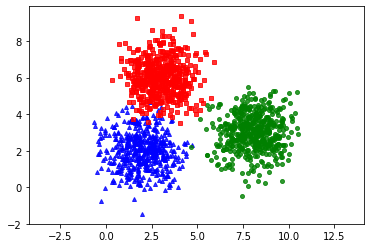

In [3]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)

In [4]:
def get_centroids(X, k):
  return X[np.random.choice(X.shape[0], k, replace=False)]

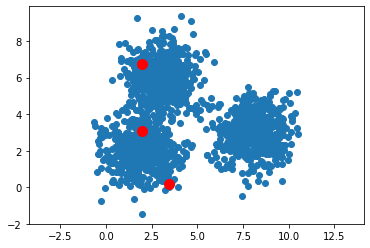

In [5]:
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
cent = get_centroids(X, 3)
plt.scatter(cent[:, 0], cent[:, 1], c='r', s=100)

In [22]:
def update_centroid(X, label, n_centr):
  new_centr = np.zeros((n_centr, X.shape[1]))
  for i in range(n_centr):
    new_centr[i,:] = X[np.where(label==i)].mean(axis=0)
  return new_centr

In [23]:
def k_means(X, k):
  centroid = get_centroids(X, k)
  stop = False
  while not stop:
    labels = np.argmin(cdist(X, centroid), axis=1)
    old_centroid = centroid.copy()
    centroid = update_centroid(X, labels, k)
    if np.all(centroid == old_centroid):
      stop = True
  return centroid, labels

In [24]:
def kmean_visualize(X, k):
  centroid, labels = k_means(X, k)
  plt.scatter(X[:, 0], X[:, 1], c=labels)
  plt.scatter(centroid[:, 0], centroid[:, 1], c='r', s=100)

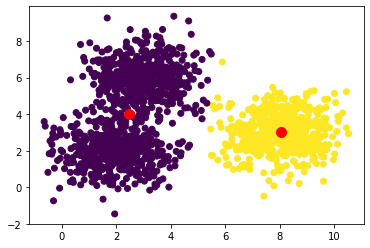

In [25]:
kmean_visualize(X,2)

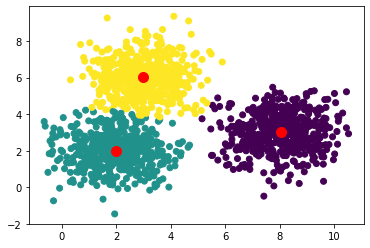

In [20]:
kmean_visualize(X,3)

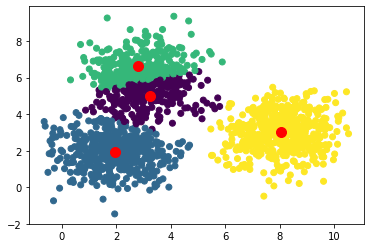

In [21]:
kmean_visualize(X,4)